In [8]:
from rembg import remove
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import utils
import cv2
import numpy as np


In [9]:
clusters = 3

In [10]:


input_path = './cropped_detections/Car_1.png'
output_path = './cropped_detections/Car_1_rembg.png'
# input_path = './cropped_detections/Truck_9.png'
# output_path = './cropped_detections/Truck_9_rembg.png'

input = Image.open(input_path)
output = remove(input)
output.save(output_path)

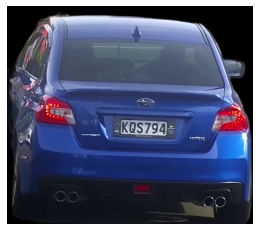

In [11]:
output = cv2.imread(output_path)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.imshow(output)

In [12]:
output_pixels = output.reshape((output.shape[0] * output.shape[1], 3))
%output_pixels = output_pixels[~(output_pixels==0).all(1)]

UsageError: Line magic function `%output_pixels` not found.


In [13]:
clt = KMeans(n_clusters=clusters)
clt.fit(output_pixels)
# clt.shape

KMeans(n_clusters=3)

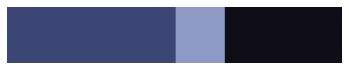

In [14]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = utils.centroid_histogram(clt)
bar = utils.plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()